In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\\Users\\Trix\\Documents\\JupyterNotebooks\\ALBATROS\\')
import rasp

### Get the SRTM3 elevation data from the web

In [13]:
latitude, longitude = loc = np.radians((49.75889, -77.62581)) # Matagami, QC

# specify propagation study area
inner_bounds = ((np.radians(48.85901), np.radians(-79.01881)), # SW corner
                (np.radians(50.65879), np.radians(-76.23280))) # NE corner
# specify transmitter inclusion area
outer_bounds = ((np.radians(48.63404), np.radians(-79.36705)), # SW corner
                (np.radians(50.88376), np.radians(-75.88455))) # NE corner

inner_extent = [inner_bounds[0][1], inner_bounds[1][1], inner_bounds[0][0], inner_bounds[1][0]]
outer_extent = [outer_bounds[0][1], outer_bounds[1][1], outer_bounds[0][0], outer_bounds[1][0]]

In [3]:
elevation = rasp.Elevation.from_web(bounds=outer_bounds)
elevation.set_region_of_interest(bounds=inner_bounds)

2020-08-04 13:10:43 | rasp | INFO | requested area overlaps 2 SRTM tiles
2020-08-04 13:10:43 | rasp | INFO | destination (C:\Users\Trix\Documents\JupyterNotebooks\ALBATROS\rasp\srtm\srtm_21_02.zip) exists; skipping download
2020-08-04 13:10:44 | rasp | INFO | destination (C:\Users\Trix\Documents\JupyterNotebooks\ALBATROS\rasp\srtm\srtm_21_03.zip) exists; skipping download


### Manually input tx480's information

In [10]:
freq480 = 148.48
lat480 = 0.8691933600210279
lon480 = -1.3531343765433521
h480 = 1.5 # not given in database so assumed to be 1.5m above ground
erp480 = 14.77121

### Calculate the attenuation map

In [11]:
attenuation = elevation.attenuation_map(lat480, lon480, h480, 
                                        rx_height=1.5, 
                                        frequency=freq480,
                                        Ns=301,
                                        horizontal=False)

In [12]:
latitude_deg = np.unique(elevation.latitude_deg[elevation.roi['inds'][0]])
nlat = len(latitude_deg)
longitude_deg = np.unique(elevation.longitude_deg[elevation.roi['inds'][1]])
nlon = len(longitude_deg)

AttenuationMap = attenuation.reshape((nlat, nlon))

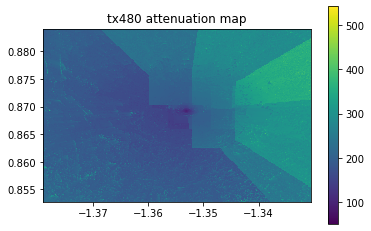

In [16]:
plt.title('tx480 attenuation map')
plt.imshow(AttenuationMap, origin='lower', extent=inner_extent)
plt.colorbar()
plt.show()

### Calculate the received power map

In [17]:
# Received power (dB) = Transmitted power (dB) + Transmitter gain (dBi) - Losses (dB)
PowerMap = -AttenuationMap + erp480 + 2.15 

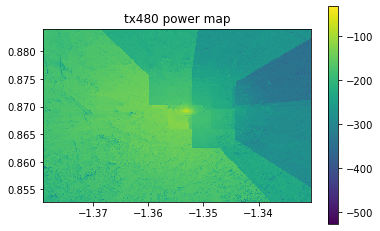

In [19]:
plt.title('tx480 power map')
plt.imshow(PowerMap, origin='lower', extent=inner_extent)
plt.colorbar()
plt.show()